In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('../data/train.csv', low_memory=False)
students = pd.read_csv('../data/Student.csv')
internship = pd.read_csv('../data/Internship.csv')
test = pd.read_csv('../data/test.csv')

In [38]:
# merge with internship and student details
train_with_internship = pd.merge(train, internship, how='left', on='Internship_ID')
test_with_internship = pd.merge(test, internship, how='left', on='Internship_ID')

# train_with_internship_clean = train_with_internship.dropna(axis=1)
# test_with_internship_clean = test_with_internship.dropna(axis=1)

students_cleaned = students.groupby('Student_ID').first()
students_cleaned = students_cleaned.reset_index()

train_with_student = pd.merge(train_with_internship, students_cleaned, on='Student_ID', how='left')
test_with_student = pd.merge(test_with_internship, students_cleaned, on='Student_ID', how='left')

train_merged = train_with_student
test_merged = test_with_student
# train_merged = train_with_student.dropna(axis=1)
# test_merged = test_with_student.dropna(axis=1)

In [ ]:
data_dictionary = pd.read_excel('../data/Data_Dictionary.xlsx')

## Training dataset

In [ ]:
train.head()

## Data about potential intern

In [ ]:
students.head()

## Data about internship opportunities

In [ ]:
internship.head()

## Test set

In [ ]:
test.head()

## Data Dictionary

In [ ]:
data_dictionary

In [43]:
list(students.columns)

['Student_ID',
 'Institute_Category',
 'Institute_location',
 'hometown',
 'Degree',
 'Stream',
 'Current_year',
 'Year_of_graduation',
 'Performance_PG',
 'PG_scale',
 'Performance_UG',
 'UG_Scale',
 'Performance_12th',
 'Performance_10th',
 'Experience_Type',
 'Profile',
 'Location',
 'Start Date',
 'End Date']

In [33]:
list(internship.columns)

['Internship_ID',
 'Internship_Profile',
 'Skills_required',
 'Internship_Type',
 'Internship_Location',
 'Internship_category',
 'No_of_openings',
 'Stipend_Type',
 'Stipend1',
 'Stipend2',
 'Internship_deadline',
 'Start_Date',
 'Internship_Duration(Months)',
 'PR',
 'UI',
 'Marketing',
 'Media',
 'Social',
 'Design',
 'Web',
 'Development',
 'Business',
 'Research',
 'Writing',
 'Plan',
 'Creative',
 'Process',
 'Database',
 'Strategy',
 'Designing',
 'Analysis',
 'Facebook',
 'Communication',
 'Rest',
 'Android',
 'Presentation',
 'Media Marketing',
 'Twitter',
 'Social Media Marketing',
 'Operations',
 'Java',
 'Quality',
 'HTML',
 'Blogs',
 'Digital Marketing',
 'PHP',
 'Market Research',
 'Recruitment',
 'Testing',
 'CSS',
 'Planning',
 'API',
 'Editing',
 'Content Writing',
 'Innovative',
 'Lead Generation',
 'Mobile App',
 'SQL',
 'Accounts',
 'Reporting',
 'JavaScript',
 'Documentation',
 'iOS',
 'Branding',
 'ACTING',
 'Analytics',
 'Initiative',
 'Advertising',
 'Cold Calli

In [4]:
list(train_merged.columns)

['Internship_ID',
 'Student_ID',
 'Earliest_Start_Date',
 'Expected_Stipend',
 'Minimum_Duration',
 'Preferred_location',
 'Is_Part_Time',
 'Is_Shortlisted',
 'Internship_Profile',
 'Skills_required',
 'Internship_Type',
 'Internship_Location',
 'Internship_category',
 'No_of_openings',
 'Stipend_Type',
 'Stipend1',
 'Stipend2',
 'Internship_deadline',
 'Start_Date',
 'Internship_Duration(Months)',
 'PR',
 'UI',
 'Marketing',
 'Media',
 'Social',
 'Design',
 'Web',
 'Development',
 'Business',
 'Research',
 'Writing',
 'Plan',
 'Creative',
 'Process',
 'Database',
 'Strategy',
 'Designing',
 'Analysis',
 'Facebook',
 'Communication',
 'Rest',
 'Android',
 'Presentation',
 'Media Marketing',
 'Twitter',
 'Social Media Marketing',
 'Operations',
 'Java',
 'Quality',
 'HTML',
 'Blogs',
 'Digital Marketing',
 'PHP',
 'Market Research',
 'Recruitment',
 'Testing',
 'CSS',
 'Planning',
 'API',
 'Editing',
 'Content Writing',
 'Innovative',
 'Lead Generation',
 'Mobile App',
 'SQL',
 'Account

## Class Distribution

In [ ]:
train_merged.Is_Shortlisted.value_counts()

## Internship Profile

In [ ]:
# (Web Development -> (Web Development, Web & Mobile App Development, Web & Android App Development ))
train_merged.Internship_Profile.value_counts()

In [ ]:
train_merged.groupby(['Internship_Profile', 'Is_Shortlisted']).size().unstack(1).fillna(0).sort_values(by=1, ascending=False)

## Stipend Expectation

In [5]:
train_merged.Expected_Stipend.value_counts()

5-10K              58552
No Expectations    53628
2-5K               42005
10K+               38397
Name: Expected_Stipend, dtype: int64

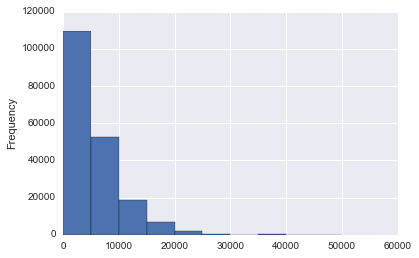

In [7]:
train_merged.Stipend1.plot(kind='hist');

In [16]:
train_merged.groupby(['Stipend2', 'Is_Shortlisted']).size().unstack(1).fillna(0).sort_values(by=0, ascending=False)

Is_Shortlisted,0,1
Stipend2,,
10000,17332,1969
15000,13080,2114
5000,9422,1587
20000,7508,1018
8000,5801,594
12000,5140,781
6000,4044,362
25000,3161,496
30000,2771,246


In [18]:
train_merged.Stipend_Type.value_counts()

variable       93315
fixed          84740
performance    12267
unpaid          2260
Name: Stipend_Type, dtype: int64

In [20]:
train_merged.groupby(['Stipend_Type', 'Is_Shortlisted']).size().unstack(1)

Is_Shortlisted,0,1
Stipend_Type,,
fixed,75052,9688
performance,9840,2427
unpaid,1588,672
variable,81523,11792


## Student Performance

In [21]:
train_merged.Current_year.value_counts()

3                     57450
already a graduate    40535
2                     35703
4                     33927
1                     22348
5                      2619
Name: Current_year, dtype: int64

In [23]:
train_merged.groupby(['Current_year', 'Is_Shortlisted']).size().unstack(1)

Is_Shortlisted,0,1
Current_year,,
1,18913,3435
2,30344,5359
3,50339,7111
4,30059,3868
5,2272,347
already a graduate,36076,4459


In [ ]:
train_merged.U

In [ ]:
def fix_percentage(row):
    percentage = row['Performance_UG']

    if row['UG_Scale'] == 100:
        percentage  /= 10
    
    return percentage

train_merged.loc[:, 'Performance_UG'] = train_merged.apply(fix_percentage, axis=1)

In [ ]:
train_merged

In [32]:
train_merged.groupby(['Performance_12th', 'Is_Shortlisted']).size().unstack(1).fillna(0).sort_values(by=1, ascending=False)

Is_Shortlisted,0,1
Performance_12th,,
70.00,3980,589
80.00,3015,466
60.00,4167,463
78.00,2736,454
72.00,2708,433
75.00,3037,425
86.00,2169,421
82.00,2146,402
85.00,2368,399


## Internship skills required

In [39]:
train_merged.loc[:, 'Skills_required'] = train_merged.Skills_required.fillna('-1')
train_merged.loc[:, 'Num_Skills_Required'] = train_merged.Skills_required.map(lambda x: len(x.split(',')))

In [42]:
train_merged.groupby(['Num_Skills_Required', 'Is_Shortlisted']).size().unstack(1).sort_values(by=1, ascending=False)

Is_Shortlisted,0,1
Num_Skills_Required,,
1,149317,20748
3,3598,1000
2,3995,845
4,3869,602
5,2580,361
6,1328,291
8,850,163
9,292,151
12,364,123


## Internship id vs Shortlist

In [ ]:
rel_internship_id = train.groupby(['Internship_ID', 'Is_Shortlisted']).size()
rel_internship_id = rel_internship_id.unstack(1).fillna(0)
rel_internship_id.plot();

### Relationship between Expected Stipend and whether intern was shortlisted or not

In [ ]:
train.groupby(['Expected_Stipend', 'Is_Shortlisted']).size()

### Does preferred location has any effect whether one would be shortlisted for internship ?

In [ ]:
train.columns

In [ ]:
preferred_location = train.groupby(['Preferred_location', 'Is_Shortlisted']).size()
preferred_location = preferred_location.unstack(1).fillna(0)
preferred_location.plot();

## Crosstabulation between Is_Part_Time and Is_Shortlisted

In [ ]:
pd.crosstab(train.Is_Part_Time, train.Is_Shortlisted)

In [ ]:
min_duration = train.groupby(['Minimum_Duration', 'Is_Shortlisted']).size()
min_duration = min_duration.unstack(1)
min_duration.plot();

In [ ]:
min_duration.cumsum().plot();

## Merge training data with student data

In [ ]:
train_student = pd.merge(train, students, how='left', on='Student_ID')
test_student = pd.merge(test, students, how='left', on='Student_ID')

### Year of Graduation

In [ ]:
byYear = train_student.groupby(['Year_of_graduation', 'Is_Shortlisted']).size()
byYear.head()

In [ ]:
train_student.pivot_table(index='Year_of_graduation', columns='Is_Shortlisted', aggfunc='count')

In [ ]:
list(students.columns)

In [ ]:
train_student.groupby(['Institute_Category', 'Is_Shortlisted']).size()

## Merge with internship data

In [ ]:
train_with_internship = pd.merge(train, internship, how='left', on='Internship_ID')

In [ ]:
train_with_internship.groupby(['No_of_openings', 'Is_Shortlisted']).size().unstack(1).plot();

In [ ]:
train_with_internship.groupby(['Internship_Type', 'Is_Shortlisted']).size().unstack(1).plot();

In [ ]:
train_with_internship.groupby(['Stipend_Type', 'Is_Shortlisted']).size().unstack(1).plot();

In [ ]:
student_cleaned = students.groupby('Student_ID').first()

In [ ]:
student_cleaned = student_cleaned.reset_index()

In [ ]:
train_with_student = pd.merge(train, student_cleaned, on='Student_ID', how='left')

In [ ]:
train_with_student.shape

In [ ]:
train_with_student = train_with_student.dropna(axis=1)
train_with_student.select_dtypes(include=['object']).columns